In [14]:
import pandas as pd
from pathlib import Path
import requests
from pprint import pprint
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import re
import math
from scipy.stats import linregress
# Turns off warning messages
import warnings
warnings.filterwarnings("ignore")

In [15]:
# store and read csv files
covid19_path = Path("Resources/us_counties_covid19_daily.csv")
counties_path = Path("Resources/county_info_city.csv")

covidaily_df = pd.read_csv(covid19_path, encoding="ISO-8859-1")
counties_df = pd.read_csv(counties_path, encoding="ISO-8859-1")

In [16]:
# display head
covidaily_df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [17]:
# filter & create data frame with my season(Spring)
beg_spring = "2020-02-29"
end_spring = "2020-06-01"
spring_filtered = (covidaily_df["date"] > beg_spring)&(covidaily_df["date"] < end_spring)
covidSP_df = covidaily_df.loc[spring_filtered]
# display covid spring df
covidSP_df

,date,county,state,fips,cases,deaths
398,2020-03-01,Maricopa,Arizona,4013.0,1,0.0
399,2020-03-01,Alameda,California,6001.0,1,0.0
400,2020-03-01,Humboldt,California,6023.0,1,0.0
401,2020-03-01,Los Angeles,California,6037.0,1,0.0
402,2020-03-01,Marin,California,6041.0,1,0.0
...,...,...,...,...,...,...
196845,2020-05-31,Sweetwater,Wyoming,56037.0,30,0.0
196846,2020-05-31,Teton,Wyoming,56039.0,100,1.0
196847,2020-05-31,Uinta,Wyoming,56041.0,12,0.0
196848,2020-05-31,Washakie,Wyoming,56043.0,35,3.0


In [18]:
# finding averages per date, county and state will not be there
spring_avgperdate_df = covidSP_df.groupby(by=["date"]).mean() 
spring_avgperdate_df

,fips,cases,deaths
date,,,
2020-03-01,21051.320000,3.259259,0.111111
2020-03-02,21375.709677,3.151515,0.181818
2020-03-03,21389.181818,3.571429,0.285714
2020-03-04,23706.189189,4.128205,0.307692
2020-03-05,24465.212766,4.653061,0.244898
...,...,...,...
2020-05-27,31443.791074,559.702163,33.755294
2020-05-28,31429.500825,566.150801,34.101342
2020-05-29,31444.735594,572.869125,34.431346


In [19]:
# reset index
spring_avgperdate_df = spring_avgperdate_df.reset_index()

In [20]:
# counting number of counties per date
countiesperday_df =  covidSP_df.groupby(["date"]).count()["county"]
countiesperday_df

date
2020-03-01      27
2020-03-02      33
2020-03-03      35
2020-03-04      39
2020-03-05      49
              ... 
2020-05-27    3052
2020-05-28    3057
2020-05-29    3064
2020-05-30    3066
2020-05-31    3070
Name: county, Length: 92, dtype: int64

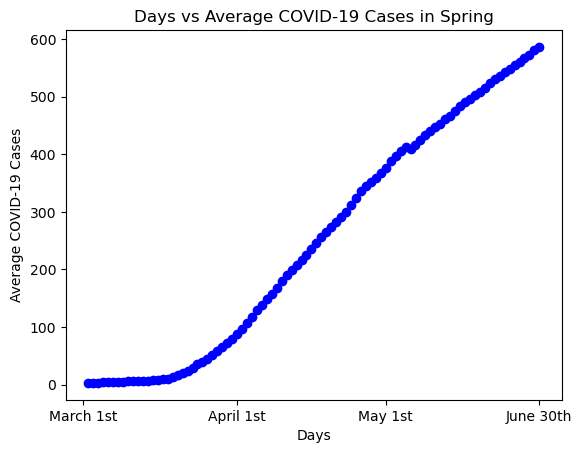

In [23]:
# Build scatter plot for date vs avg cases
x_axis = np.array([i for i in range(1,93)])
y_axis = spring_avgperdate_df["cases"]

# Incorporate the other graph properties
plt.scatter(x_axis, y_axis, marker="o", color="blue")
plt.xticks([0, 31, 61, 92], ["March 1st", "April 1st", "May 1st", "June 30th"])

plt.title("Days vs Average COVID-19 Cases in Spring")
plt.xlabel("Days")
plt.ylabel("Average COVID-19 Cases")

# Show plot
plt.show()

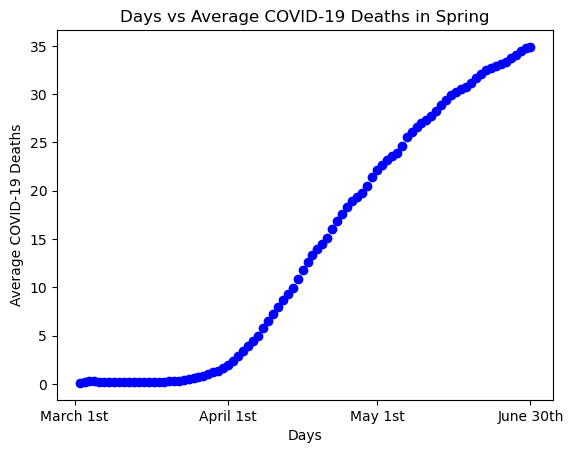

In [24]:
# Build scatter plot for date vs death cases
x_axis = np.array([i for i in range(1,93)])
y_axis = spring_avgperdate_df["deaths"]

# Incorporate the other graph properties
plt.scatter(x_axis, y_axis, marker="o", color="blue")
plt.xticks([0, 31, 61, 92], ["March 1st", "April 1st", "May 1st", "June 30th"])

plt.title("Days vs Average COVID-19 Deaths in Spring")
plt.xlabel("Days")
plt.ylabel("Average COVID-19 Deaths")

# Show plot
plt.show()

In [25]:
# display date frame
counties_df

,State,County FIPS Code,County or Equivalent,Seat
0,Alabama,1001,Autauga County,Prattville
1,Alabama,1003,Baldwin County,Bay Minette
2,Alabama,1005,Barbour County,Clayton
3,Alabama,1007,Bibb County,Centreville
4,Alabama,1009,Blount County,Oneonta
...,...,...,...,...
3097,Wyoming,56039,Teton County,Jackson
3098,Wyoming,56039,Teton County,Jackson
3099,Wyoming,56041,Uinta County,Evanston
3100,Wyoming,56043,Washakie County,Worland


In [28]:
# create a column for city(seat), and state to covid19 file
grab_cols = ["Seat", "State"]
counties_df["City, State"] = counties_df[grab_cols].apply(lambda row: ", ".join(row.values.astype(str)), axis=1)

counties_df.head()

,State,County FIPS Code,County or Equivalent,Seat,"City, State"
0,Alabama,1001,Autauga County,Prattville,"Prattville, Alabama"
1,Alabama,1003,Baldwin County,Bay Minette,"Bay Minette, Alabama"
2,Alabama,1005,Barbour County,Clayton,"Clayton, Alabama"
3,Alabama,1007,Bibb County,Centreville,"Centreville, Alabama"
4,Alabama,1009,Blount County,Oneonta,"Oneonta, Alabama"


In [29]:
# Combining 3 chosen counties in dataframe
three_counties_df = counties_df.loc[counties_df["County FIPS Code"].isin([48201,int("04013"),53033])]
three_counties_df.head()


,State,County FIPS Code,County or Equivalent,Seat,"City, State"
92,Arizona,4013,Maricopa County,Phoenix,"Phoenix, Arizona"
2617,Texas,48201,Harris County,Houston,"Houston, Texas"
2926,Washington,53033,King County,Seattle,"Seattle, Washington"
